# Clustering toy example
In the following example, we will consider a synthetic clustering problem that is based on the same data as in the classification example. But here we just drop the labels...

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

np.random.seed(42)

%matplotlib inline
plt.style.use('bmh')

# Change the color map
mpl.rcParams['image.cmap'] = 'Paired_r'

def plot_boundary(clf, X, Y):
    """Plot the boundary of a given classifier as well as the input data"""
    h = 0.02
    x_min, x_max = X[:,0].min() - 10 * h, X[:,0].max() + 10 * h
    y_min, y_max = X[:,1].min() - 10 * h, X[:,1].max() + 10 * h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, alpha=0.30)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k')

## Generate Data
We make some data (800 instances) and split it into training and test sets (400 each).

In [2]:
def make_data(n):
    k = int(n / 2)
    X1 = np.random.multivariate_normal([-1, -1], [[0.5, 0.6], [0.6, 0.9]], k)
    X2 = np.random.multivariate_normal([1, 1], [[1, -0.4], [-0.4, 0.7]], n-k)
    X = np.concatenate((X1, X2))
    y = np.zeros(len(X))
    y[k+1:] = 1
    return X, y

X, y = make_data(n=400)

In [3]:
print(sum(y) / len(y))

0.4975


## Visualize the data

As you can see, the blue dots tend to be situated in an ellipsis-shaped region near the middle, and the red dots outside this region.

Text(0.5,1,'unlabeled data')

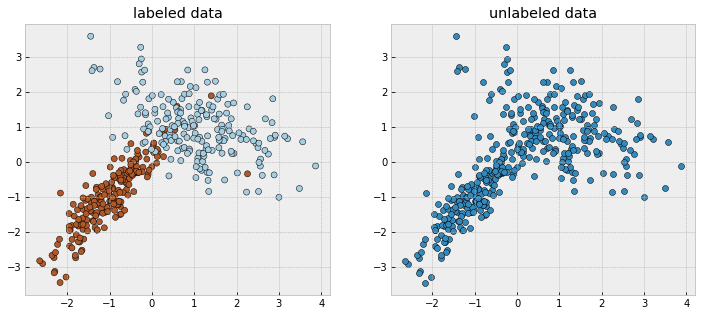

In [4]:
fig, axes = plt.subplots(1,2, figsize=(12, 5))
axes[0].scatter(X[:,0], X[:,1], c=y, edgecolors='k')
axes[0].set_title('labeled data')
axes[1].scatter(X[:,0], X[:,1], edgecolors='k')
axes[1].set_title('unlabeled data')

In [5]:
def showClustering(algo, X, y):
    fig, axes = plt.subplots(1,2, figsize=(12, 5))
    axes[0].scatter(X[:,0], X[:,1], c=y, edgecolors='k')
    axes[0].set_title('labeled data')
    
    labels = algo.fit(X).predict(X)
    axes[1].scatter(X[:,0], X[:,1], c=labels, edgecolors='k')
    axes[1].set_title('Clusters')
    return labels

## K-Means

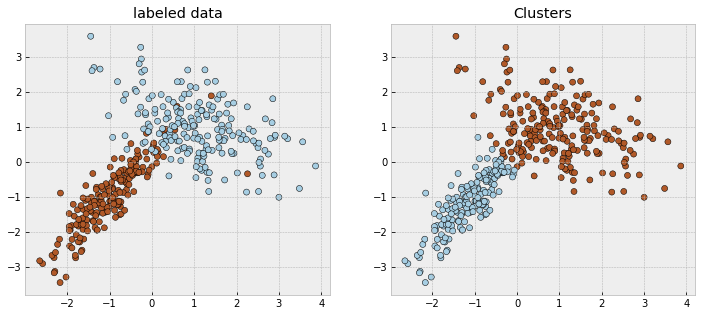

In [6]:
from sklearn.cluster import KMeans

labels = showClustering(KMeans(n_clusters=2), X, y)

## Evaluation using silhouette score

In [7]:
from sklearn import metrics
score = metrics.silhouette_score(X, labels)
score

0.5399248094938763

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


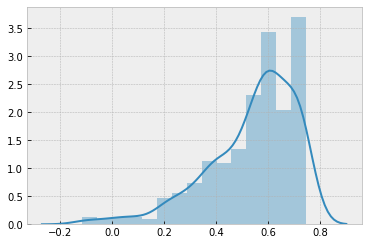

In [8]:
import seaborn as sns
scores = metrics.silhouette_samples(X, labels)
sns.distplot(scores);

## More cluster ?

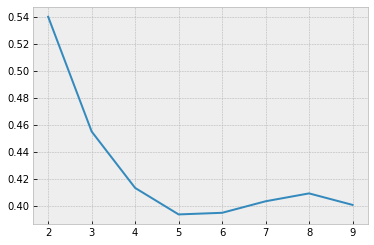

In [9]:
silhouettes = []
nclusters = list(range(2, 10))
for k in nclusters:
    silhouettes.append(metrics.silhouette_score(X, KMeans(n_clusters=k, random_state=42).fit(X).predict(X)))

plt.plot(nclusters, silhouettes)

# MeanShift

In [ ]:
from sklearn.cluster import MeanShift

ms_labels = showClustering(MeanShift(), X, y)

# Gaussian Mixture Models

In [ ]:
from sklearn.mixture import GaussianMixture

ms_labels = showClustering(GaussianMixture(n_components=2), X, y)